<a href="https://colab.research.google.com/github/Material-Educativo/Inteligencia-artificial-aplicada/blob/main/Clustering/K_medias_en_NFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-medias
En este notebook se aplicará k-medias para separar en dos clústeres los datos del archivo $NFL\_Filtrado.csv$.

Primero se importarán las bibliotecas necesarias.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

Empleamos pandas para cargar la información del archivo csv y la guardamos en un dataframe.

Recuerda "activar la unidad de Drive" cambiar la ruta para que el programa pueda encontrarlo en tu drive.

In [ ]:
# Enlace del archivo CSV en Google Drive
# Especifica la ruta en tu Google Drive donde quieres guardar el archivo CSV
ruta_csv = "/content/drive/MyDrive/Material Academico/Inteligencia artificial Diplomado/Notebooks/NFL_Filtrado.csv"

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(ruta_csv)

#Imprimir la información del dataframe
print(df.head())

   Height (inches)  Weight (lbs) Position
0               77           305       DE
1               72           210       DB
2               74           190       CB
3               74           208       CB
4               72           212       FS


Ahora extraemos las columnas de altura y peso para usarlas en el clustering.

También es importante normalizar los datos antes de aplicar cualquier técnica de clustering, ya que los algoritmos son sensibles a las escalas de las variables.

In [ ]:
# Extraer las columnas de altura y peso
X = df[['Height (inches)', 'Weight (lbs)']]

# Normalizar los datos
scaler = MinMaxScaler()
X_normalizado = scaler.fit_transform(X)
print(X_normalizado)

[[0.71428571 0.71359223]
 [0.35714286 0.25242718]
 [0.5        0.15533981]
 ...
 [0.42857143 0.22815534]
 [0.42857143 0.14563107]
 [0.85714286 0.62621359]]


Aplicamos k-medias y agregamos una columna adicional en el dataframe, con el número de clúster al cual fue asignada cada muestra.

In [ ]:
# Definir el número de clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(X_normalizado)

# Obtener las etiquetas de los clusters
df['KMedias_Clusters'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Height (inches),Weight (lbs),Position,KMedias_Clusters
0,77,305,DE,0
1,72,210,DB,1
2,74,190,CB,1
3,74,208,CB,1
4,72,212,FS,1


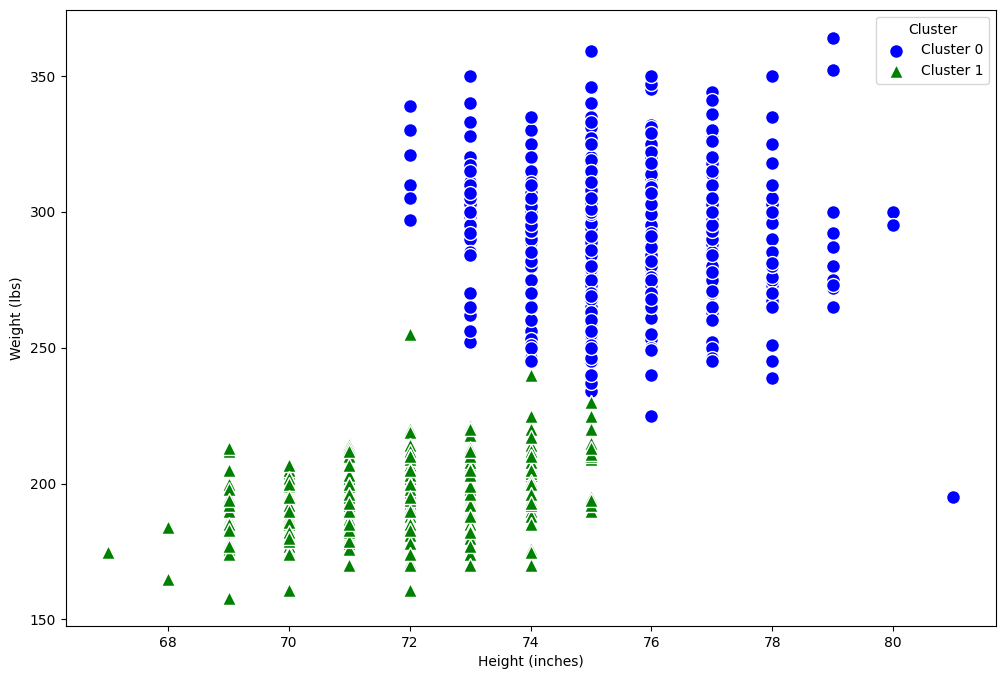

In [ ]:
# Crear una figura y un eje
plt.figure(figsize=(12, 8))

# Filtrar los datos por cluster
cluster_0 = df[df['KMedias_Clusters'] == 0]
cluster_1 = df[df['KMedias_Clusters'] == 1]

# Graficar los datos
plt.scatter(cluster_0['Height (inches)'], cluster_0['Weight (lbs)'],
            color='blue', marker='o', label='Cluster 0', s=100, edgecolor='w')
plt.scatter(cluster_1['Height (inches)'], cluster_1['Weight (lbs)'],
            color='green', marker='^', label='Cluster 1', s=100, edgecolor='w')

# Configurar el título y las etiquetas
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.legend(title='Cluster', loc='upper right')

# Mostrar el gráfico
plt.show()

